In [1]:
import eland as ed
import numpy as np
import os

from elasticsearch import Elasticsearch
from dotenv import load_dotenv
from app.utils.backtesting_utils import get_sma

os.chdir("..")
load_dotenv()

True

In [2]:
es_url = os.environ.get('ELASTICSEARCH_URL')
es_api_key = os.environ.get('ELASTICSEARCH_API_KEY')
es = Elasticsearch(hosts=[f"{es_url}"], api_key=es_api_key)

In [3]:
%%capture
ticker="GOOG"
df_eod = ed.DataFrame(es, es_index_pattern="quant-agents_stocks-eod_*")
df_eod = df_eod[(df_eod.key_ticker == ticker)]
df_sma = ed.eland_to_pandas(df_eod).sort_values(by='date_reference', ascending=True).tail(100).set_index('date_reference')
df_sma, df_crossovers = get_sma(df_sma)

In [4]:
df_sma.tail()

,key_ticker,val_close,val_high,val_low,val_open,val_volume,sma_short,sma_long,position,returns,strategy
date_reference,,,,,,,,,,,
2025-10-27,GOOG,269.93,270.800,264.940,265.360,22987660,254.863,249.9520,1,0.035521,0.035521
2025-10-28,GOOG,268.43,271.380,267.170,270.200,20101160,257.087,251.1960,1,-0.005572,-0.005572
2025-10-29,GOOG,275.17,275.970,268.430,268.610,26287850,259.433,252.6775,1,0.024799,0.024799
2025-10-30,GOOG,281.90,291.930,280.450,291.720,48570034,262.435,254.4510,1,0.024163,0.024163
2025-10-31,GOOG,281.82,286.285,277.523,283.205,29932813,265.238,256.2195,1,-0.000284,-0.000284


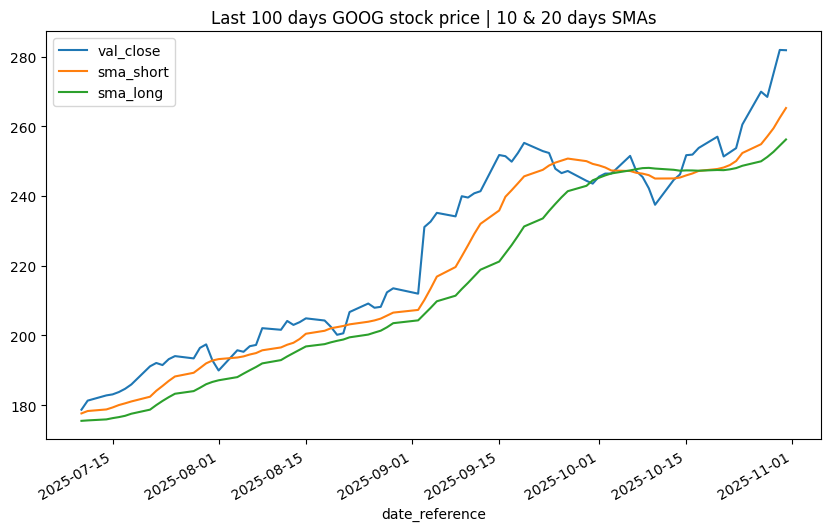

In [5]:
df_sma[["val_close", "sma_short", "sma_long"]].plot(title=f"Last 100 days {ticker} stock price | 10 & 20 days SMAs", figsize=(10, 6));

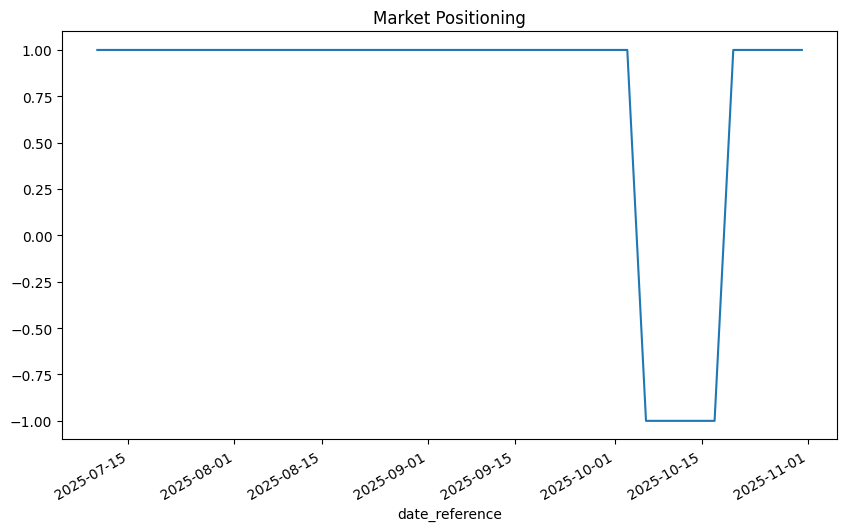

In [6]:
df_sma['position'].plot(
    ylim=[-1.1, 1.1],
    title='Market Positioning',
    figsize=(10, 6)
);

In [7]:
df_sma[['returns', 'strategy']].sum().apply(np.exp)

returns     1.586288
strategy    1.501375
dtype: float64

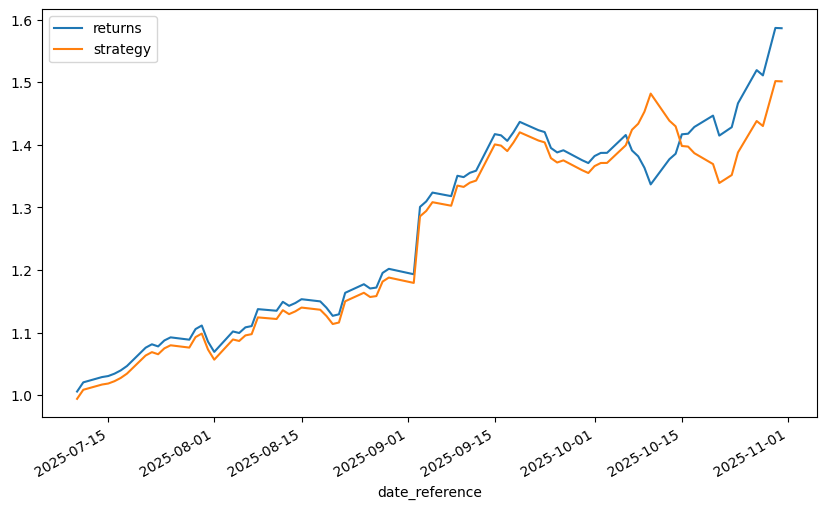

In [8]:
df_sma[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [9]:
df_crossovers[['val_close', 'sma_short', 'sma_long', 'position']]

,val_close,sma_short,sma_long,position
date_reference,,,,
2025-10-06,251.51,247.176,247.345,-1
2025-10-20,257.02,247.752,247.464,1
